# *Pretty Data Plots on Insurance Data*

In [1]:
# REQUIRED LIBRARIES
import os # provides functions for interacting with the operating system.
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
import warnings # ignore warnings
warnings.filterwarnings('ignore')

In [2]:
# upload csv file
insurance_df = pd.read_csv(r'C:\Users\user\Desktop\FTW Foudation_Batch 4\day 6\insurance_regression.csv')
insurance_df.head() # display 1st five rows of the csv

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_df.shape # rows, columns

(1338, 7)

In [4]:
insurance_df.info() # summary of data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance_df.columns # column names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
insurance_df.dtypes # data type per column

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

##### Summary

In [7]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
insurance_df.age.median()

39.0

In [9]:
insurance_df.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


In [10]:
insurance_df.var(ddof=0) # variance

age         1.972539e+02
bmi         3.716009e+01
children    1.452127e+00
charges     1.465428e+08
dtype: float64

##### Variability

In [11]:
insurance_df.nunique() # count unique values in a column

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [12]:
insurance_df.count() # count values per col

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [13]:
insurance_df.sex.unique()

array(['female', 'male'], dtype=object)

In [14]:
insurance_df.sex.value_counts() # count per value in a col

male      676
female    662
Name: sex, dtype: int64

In [15]:
insurance_df.region.value_counts() 

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [16]:
insurance_df.age.value_counts().sort_values(ascending=False) 

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
49    28
28    28
27    28
21    28
22    28
23    28
26    28
24    28
25    28
53    28
54    28
29    27
31    27
30    27
43    27
44    27
40    27
42    27
41    27
55    26
33    26
32    26
56    26
34    26
57    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64

In [17]:
insurance_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [18]:
# dataframe if all female only
female_df = insurance_df.sex == 'female'
in_female = insurance_df[female_df]
in_female.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


In [19]:
# dataframe if all male only
male_df = insurance_df.sex == 'male'
in_male = insurance_df[male_df]
in_male.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070


#### COMPLETENESS

In [20]:
insurance_df.isnull().sum() # count null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
insurance_df.notnull().sum() #count non null values

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [22]:
# unique rows
insurance_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [23]:
# unique rows
insurance_df.duplicated().value_counts()

False    1337
True        1
dtype: int64

In [24]:
# display what rows have duplicate values
duplicate_df = insurance_df[insurance_df.duplicated(keep=False)==True]
print(duplicate_df)

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


# Plotting with Seaborn

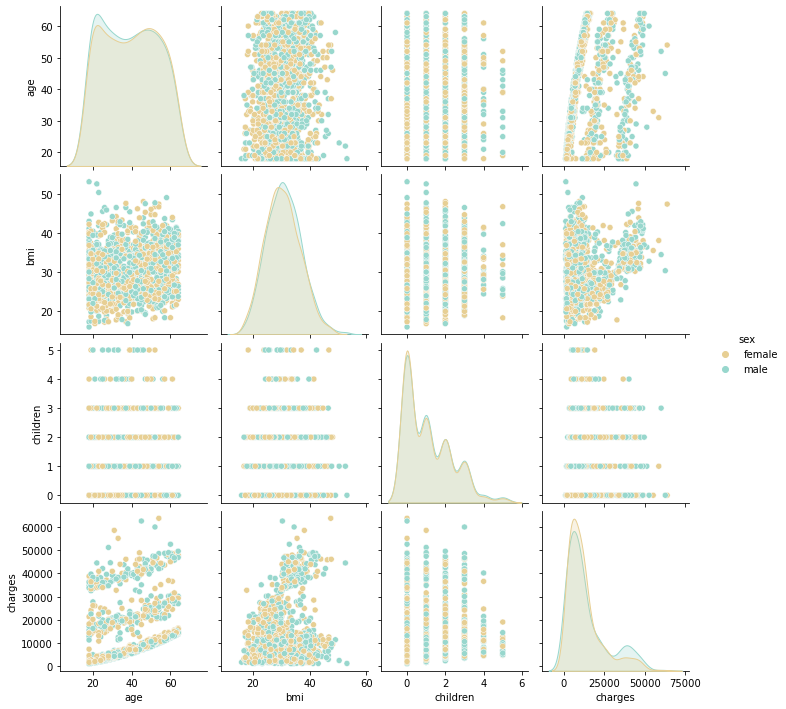

In [25]:
sns.pairplot(insurance_df, hue ='sex', palette = 'BrBG')

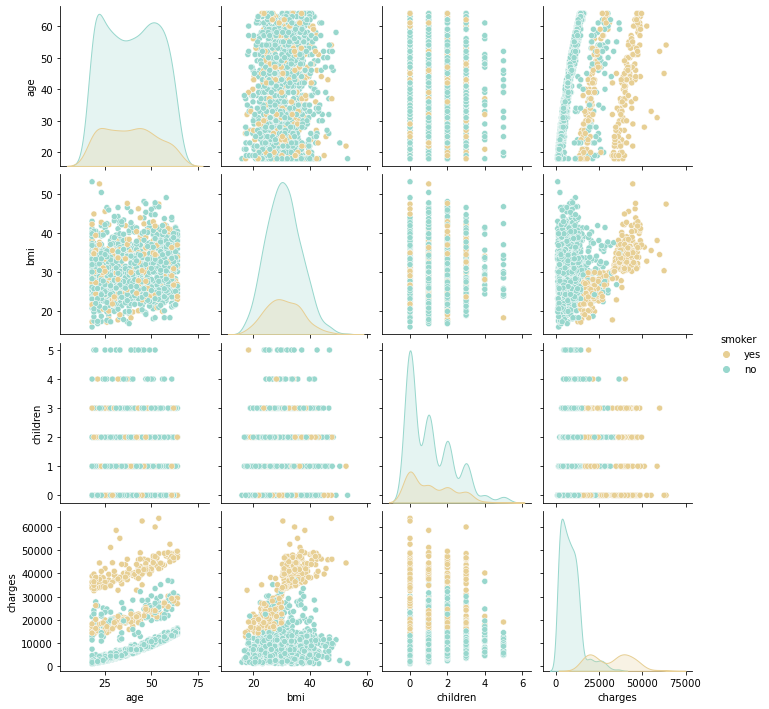

In [26]:
sns.pairplot(insurance_df, hue ='smoker', palette = 'BrBG')

# Age

In [27]:
age_1 = insurance_df[['sex','age']]
age_1.head()

,sex,age
0,female,19
1,male,18
2,male,28
3,male,33
4,male,32


In [28]:
age_1['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

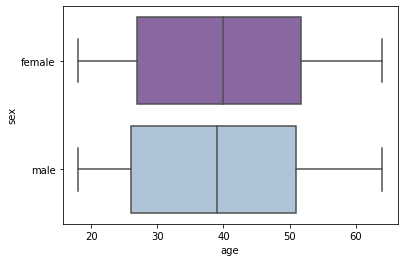

In [29]:
# boxplot age of female vs male
sns.boxplot(x=insurance_df['age'], y=insurance_df['sex'], palette = 'BuPu_r', orient='h')

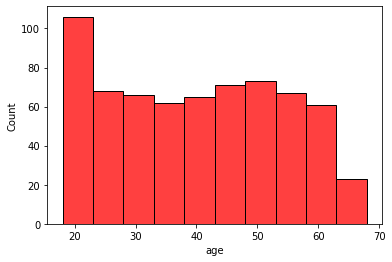

In [30]:
sns.histplot(in_female, x = 'age', color ='red', binwidth=5)

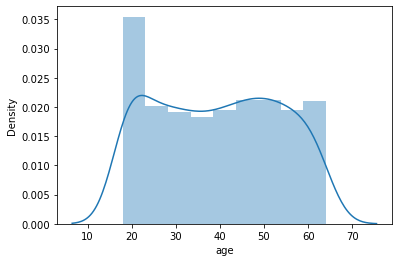

In [31]:
sns.distplot(in_female['age'], kde=True)
plt.show()

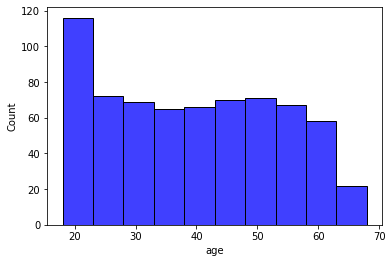

In [32]:
sns.histplot(in_male, x = 'age', color ='blue', binwidth=5)

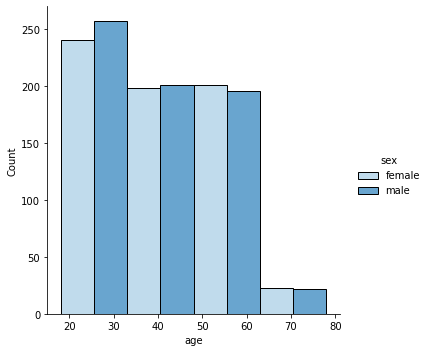

In [33]:
sns.displot(insurance_df, x="age", hue="sex", multiple = 'dodge', palette = 'Blues', binwidth=15)

# Region

In [34]:
region_1 = insurance_df[['region','sex']]

In [35]:
region_1.head()

,region,sex
0,southwest,female
1,southeast,male
2,southeast,male
3,northwest,male
4,northwest,male


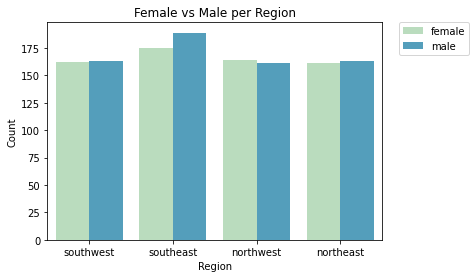

In [36]:
sns.countplot(data = region_1, x = 'region', hue = 'sex', palette = 'GnBu')
plt.title("Female vs Male per Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # move legend out the plot
plt.show()

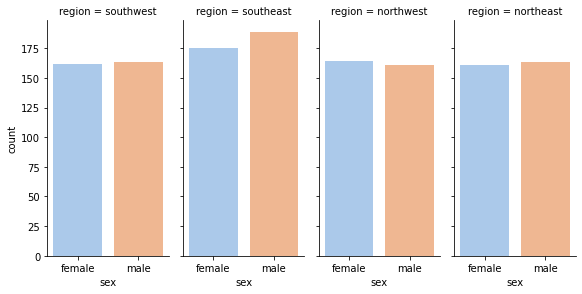

In [37]:
g = sns.catplot(x="sex", hue="sex", col="region", 
                data=region_1, kind="count", 
                height=4, aspect=.5, dodge=False, palette ='pastel')

# BMI

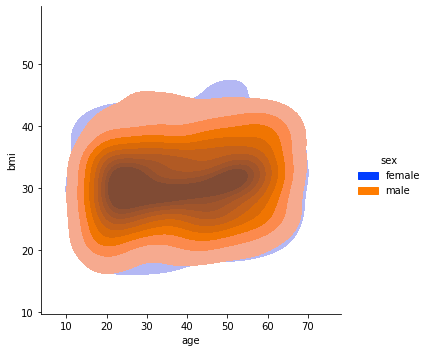

In [38]:
sns.displot(insurance_df, x="age", y='bmi', hue="sex", kind='kde', fill=True, palette = 'bright')

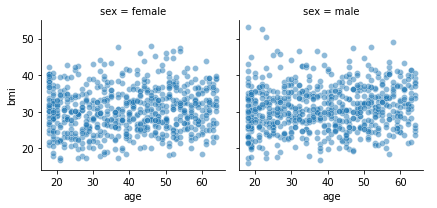

In [39]:
g = sns.FacetGrid(insurance_df, col="sex")
g.map(sns.scatterplot, "age", "bmi", alpha=.5)
g.add_legend()

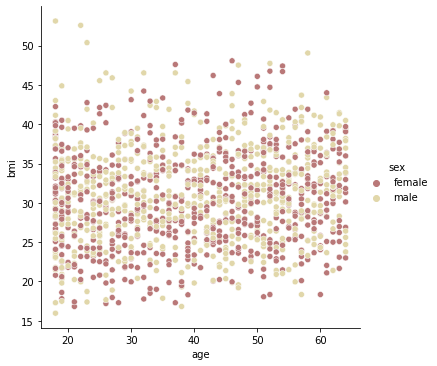

In [40]:
sns.relplot(x="age", y="bmi", hue="sex", data=insurance_df, palette = 'pink')

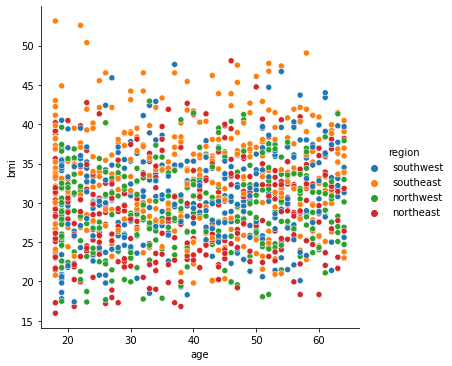

In [41]:
sns.relplot(x="age", y="bmi", hue="region", data=insurance_df)

# BMI

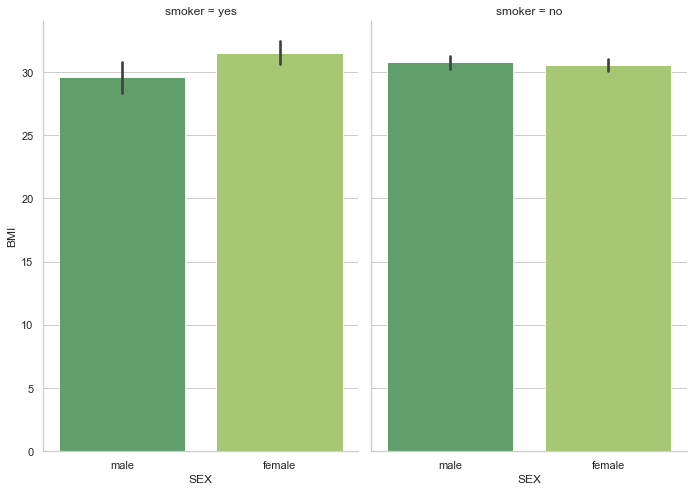

In [43]:
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(insurance_df, col="smoker", height=7, aspect=.7)
g.map(sns.barplot, "sex", "bmi", palette = 'summer')
g.set_axis_labels("SEX", "BMI")

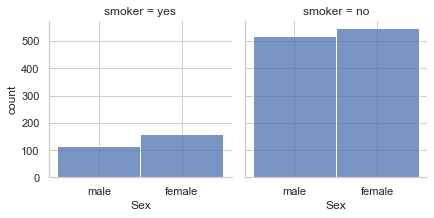

In [45]:
g = sns.FacetGrid(insurance_df, col="smoker")
g.map_dataframe(sns.histplot, x="sex", palette = '')
g.set_axis_labels("Sex", "count")

# Number of Children

In [47]:
count = insurance_df.groupby(['sex', 'children']).size() 
print(count) 

sex     children
female  0           289
        1           158
        2           119
        3            77
        4            11
        5             8
male    0           285
        1           166
        2           121
        3            80
        4            14
        5            10
dtype: int64


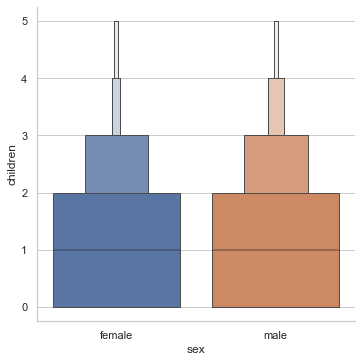

In [48]:
sns.catplot(x="sex", y="children", order=["female", "male"],kind='boxen', data=insurance_df)

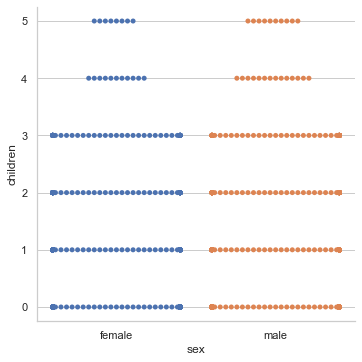

In [49]:
sns.catplot(x="sex", y="children", order=["female", "male"],kind='swarm', data=insurance_df)

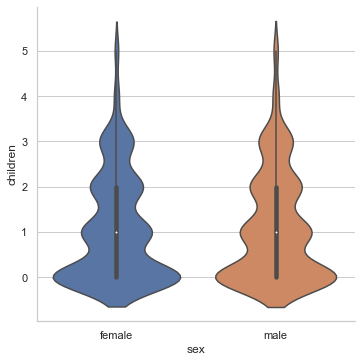

In [50]:
sns.catplot(x="sex", y="children", order=["female", "male"],kind='violin', data=insurance_df)

# Insurance Charges

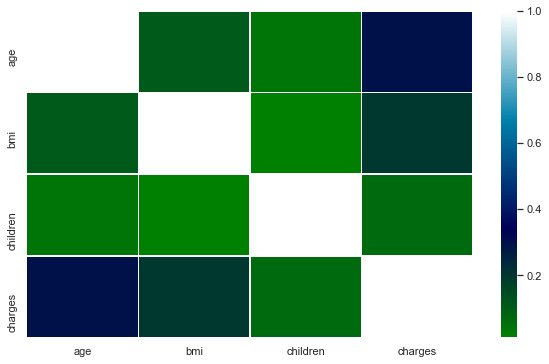

In [51]:
plt.figure(figsize=(10,6))
# Calculate correlations
corr = insurance_df.corr()
 
# Heatmap
sns.heatmap(corr, linewidths=.5, cmap="ocean")

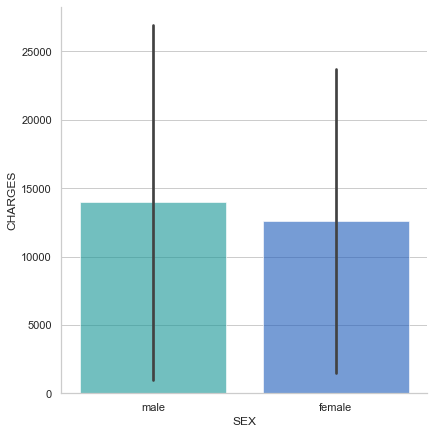

In [52]:
g = sns.catplot(
    data=insurance_df, kind="bar",
    x="sex", y="charges", hue="sex",
    ci="sd", palette="winter", alpha=.6, height=6, dodge=False, order =['male','female'])
g.set_axis_labels("SEX", "CHARGES")